In [1]:
import numpy as np   #This imports all the packages I will need to finsish my project
import math as mat
import scipy as sp
import pandas as pd
import matplotlib as mp
import seaborn as sns

In [2]:
df = pd.read_csv('meteorite-landings.csv') #making sure the csv is being read by the program correctly
df.head(5)

,Unnamed: 0,mass,year,reclat,reclong,log(mass)
0,0,21.0,1880,50.77500,6.08333,1.322219
1,1,720.0,1951,56.18333,10.23333,2.857332
2,2,107000.0,1952,54.21667,-113.00000,5.029384
3,3,1914.0,1976,16.88333,-99.90000,3.281942
4,4,780.0,1902,-33.16667,-64.95000,2.892095


In [101]:
df = df.drop(labels = ['id','name','nametype','GeoLocation','recclass','fall'], axis = 1) #here I am getting rid of columns of data that I will not be using in the project
filepath = '.\meteorite-landings.csv'
df.to_csv(filepath)

In [102]:
df = df.dropna(subset = ['mass','reclat','reclong','year'], axis = 0) #getting rid of rows where information is missing in essential columns
filepath = '.\meteorite-landings.csv'
df.to_csv(filepath)

In [103]:
df = df[df['mass'] != 0] #getting rid of any rows with 0 as an input for mass
filepath = '.\meteorite-landings.csv'
df.to_csv(filepath)

In [106]:
df = df[df['reclat'] + df['reclong'] != 0] #getting rid of any rows where both latitude and longitude are 0 (this corresponds to a spot in the ocean off the coast of Africa)
filepath = '.\meteorite-landings.csv'
df.to_csv(filepath)

In [109]:
df = df[(df['year'] >= 800) & (df['year'] <= 2016)] #getting rid of rows with misinputs for the fall date (years before 800 and after 2016)
filepath = '.\meteorite-landings.csv'
df.to_csv(filepath)

In [3]:
df.describe()  #some statistics regarding my data (mass is in grams)

,Unnamed: 0,mass,year,reclat,reclong,log(mass)
count,31911.000000,3.191100e+04,31911.000000,31911.000000,31911.000000,31911.000000
mean,15955.000000,1.855334e+04,1986.983611,-47.325541,73.217418,1.629775
std,9212.056556,6.870431e+05,26.723522,46.668084,83.196982,1.146890
min,0.000000,1.000000e-02,860.000000,-87.366670,-165.433330,-2.000000
25%,7977.500000,6.500000e+00,1982.000000,-79.683330,26.000000,0.812913
50%,15955.000000,2.968000e+01,1991.000000,-72.000000,56.837750,1.472464
75%,23932.500000,2.021050e+02,2000.000000,18.321420,159.394165,2.305577
max,31910.000000,6.000000e+07,2013.000000,81.166670,178.200000,7.778151


In [4]:
print('the minimum mass of a meteorite in this set is', df['mass'].min(), 'grams')
print('the average mass of a meteorite is', df['mass'].mean(), 'grams')
print('the maximum mass of a meteorite in this set is', df['mass'].max(), 'grams')

the minimum mass of a meteorite in this set is 0.01 grams
the average mass of a meteorite is 18553.344917896648 grams
the maximum mass of a meteorite in this set is 60000000.0 grams


### I realized early in this project that it would become more about the most likely meteorite to be found as opposed to the most likely meteorite to land on Earth. This is demonstrated above. While most meteorites are probably of very low mass, the average found meteorite in this set weighs north of 30 pounds. This is because high mass meteorites are way more likely to be spotted than low mass ones.

In [131]:
df['log(mass)'] = np.log10(df['mass']) #added a column for the log of the original mass so I can plot the distribution of found meteorite mass more effectively
filepath = '.\meteorite-landings.csv'
df.to_csv(filepath)

[Text(0.5, 0, 'log(mass)')]

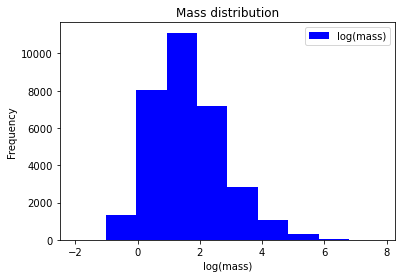

In [6]:
df.plot(y = 'log(mass)', kind = 'hist', color = 'blue', title = 'Mass distribution').set(xlabel = 'log(mass)')

### Here you can see that while found meteorites do tend toward a lower mass the fact larger meteorites are easier found makes the distribution more even

[Text(0.5, 0, 'Year')]

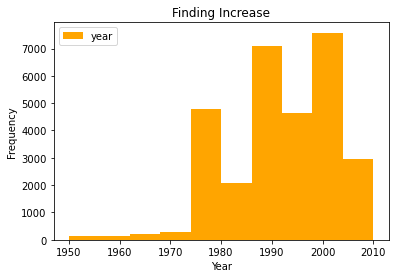

In [19]:
dfy = df[(df['year'] >= 1950) & (df['year'] <= 2010)]
dfy.plot(y = 'year', kind = 'hist', color = 'orange', title = 'Finding Increase').set(xlabel = 'Year')

### Here is a histogram of meteorite discovery distribution since 1950. It seems that findings have drastically increased since 1950. I theorize that the sporadic increase/decrease cycle since the late 70's has to do with how present we are in the Antarctic at different periods of time sice that is prime territory for discovering meteorites. 

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

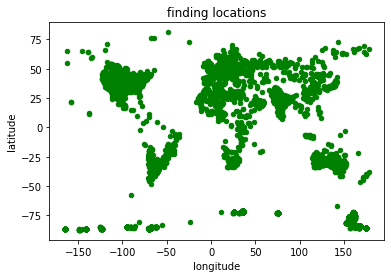

In [21]:
df.plot(y = 'reclat', x = 'reclong', kind = 'scatter', color = 'green', title = 'finding locations').set(xlabel = 'longitude',ylabel = 'latitude')

### Here is an unorthodox scatter plot I made to chart meteorite findings by their location on Earth. It ends up showing a map where you can see places that would be difficult to find meteorites like the Arctic or the Amazon Rainforest

In [ ]:
x = df['reclong']
y = df['reclat']

mp.scatter(x, y, )